1. Data Ingestion Pipeline:

   a. Design a data ingestion pipeline that collects and stores data from various sources such as databases, APIs, and streaming platforms.
   
   b. Implement a real-time data ingestion pipeline for processing sensor data from IoT devices.
   
   
   c. Develop a data ingestion pipeline that handles data from different file formats (CSV, JSON, etc.) and performs data validation and cleansing.


### a. Design a data ingestion pipeline that collects and stores data from various sources such as databases, APIs, and streaming platforms.

!<img src="https://www.scaleyourapp.com/wp-content/uploads/2018/12/Data-ingestion-min-1-1024x641.jpg" width="900" height="300"/>

#### b. Implementing a Real-time Data Ingestion Pipeline for IoT Sensor Data:

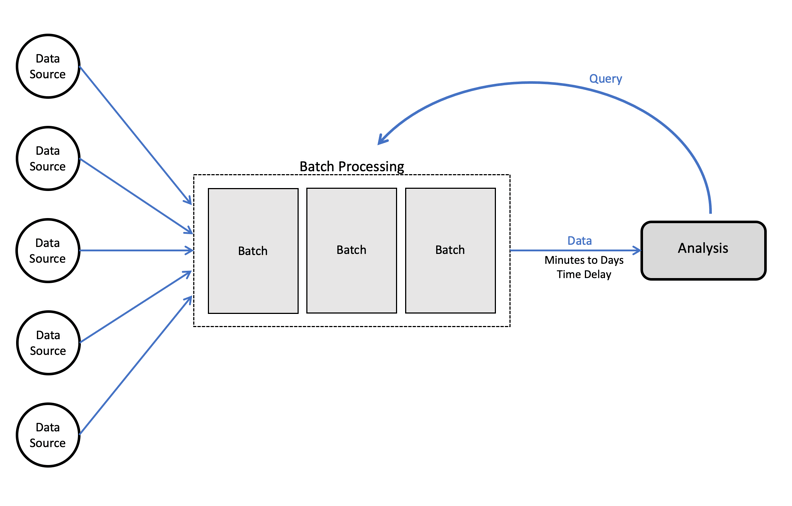

### c. Developing a Data Ingestion Pipeline for Handling Different File Formats:

In [1]:
import time
from prometheus_client import start_http_server, Summary, Counter

# Define Prometheus metrics
INGESTION_TIME = Summary('data_ingestion_duration_seconds', 'Time taken for data ingestion')
TOTAL_RECORDS = Counter('data_ingestion_total_records', 'Total number of records ingested')
ERROR_COUNTER = Counter('data_ingestion_errors_total', 'Total number of errors during data ingestion')

# Start Prometheus HTTP server on port 8000
start_http_server(8000)

def ingest_data(data):
    try:
        # Perform data ingestion logic here
        start_time = time.time()

        # Simulating data ingestion
        time.sleep(0.5)

        ingestion_duration = time.time() - start_time

        # Update Prometheus metrics
        INGESTION_TIME.observe(ingestion_duration)
        TOTAL_RECORDS.inc()

    except Exception as e:
        # Log and count any errors during data ingestion
        print(f"Error during data ingestion: {str(e)}")
        ERROR_COUNTER.inc()

# Simulating data ingestion
for i in range(10):
    ingest_data(f"Data {i}")
    time.sleep(1)
     

# 2. Model Training:


####  a. Build a machine learning model to predict customer churn based on a given dataset. Train the model using appropriate algorithms and evaluate its performance.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import tensorflow as tf


In [3]:
df = pd.read_csv(r"Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.shape

(10000, 14)

In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Generating Matrix of Features

X = data.iloc[:,3:-1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
X[100]

array([665, 'France', 'Female', 40, 6, 0.0, 1, 1, 1, 161848.03],
      dtype=object)

In [15]:
#Generating Dependent Variable Vectors

Y = data.iloc[:,-1].values
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [16]:
#Encoding Categorical Variable Gender

from sklearn.preprocessing import LabelEncoder


LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [17]:
#Encoding Categorical variable Geography

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [18]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [19]:
#Splitting dataset into training and testing dataset

from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Initialising ANN

ann = tf.keras.models.Sequential()

In [24]:
#Adding First Hidden Layer

ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer

ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer

ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [25]:
#Compiling ANN

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [27]:
#Fitting ANN

ann.fit(X_train,Y_train,batch_size=32,epochs = 10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.8641
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8645
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8639
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8637
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8634
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8641
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8650
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8645
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8655
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8624

In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

In [33]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.811
Precision: 0.5818181818181818
Recall: 0.23703703703703705
F1 Score: 0.3368421052631579
ROC AUC Score: 0.5968884244746313


#### b. Develop a model training pipeline that incorporates feature engineering techniques such as one-hot encoding, feature scaling, and dimensionality reduction.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## read the mnist dataset

# one-hot encoding,
df = pd.get_dummies(df, drop_first=True)
print(df)

# feature scaling,
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

# dimensionality reduction
sigma = np.cov(df_scaled)
l, x = np.linalg.eig(df_scaled.T @df_scaled/213)

print(l)   # Eigan values
# We will select the eigan value with maximum value

print(x)    # Eigan vectors
# We will select the vector as per Eigan value for line rotation

####   c. Train a deep learning model for image classification using transfer learning and fine-tuning techniques.



# 3. Model Validation:

#### a. Implement cross-validation to evaluate the performance of a regression model for predicting housing prices.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [41]:
df = pd.read_csv(r"C:\Users\Balodi\Downloads\archive (6)\Participants_Data_HPP\Train.csv")

In [42]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [54]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [58]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [59]:
## encoding
# one-hot encoding,
df = pd.get_dummies(df, drop_first=True)
print(df)



       UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  RESALE  \
0                       0     0        2  1300.236407              1       1   
1                       0     0        2  1275.000000              1       1   
2                       0     0        2   933.159722              1       1   
3                       0     1        2   929.921143              1       1   
4                       1     0        2   999.009247              0       1   
...                   ...   ...      ...          ...            ...     ...   
29446                   0     0        3  2500.000000              1       1   
29447                   0     0        2   769.230769              1       1   
29448                   0     0        2  1022.641509              1       1   
29449                   0     0        2   927.079009              1       1   
29450                   0     1        2   896.774194              1       1   

       LONGITUDE   LATITUDE  TARGET(PRI

In [60]:
# 3. Independent And dependent features


X=df.iloc[:,2:]
y=df.iloc[:,1]
X=X.dropna(axis=1)

In [61]:
# 4. Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [62]:
# 5. Define folds to test the values of k in the given range

folds = range(2,31)

In [63]:
# 6. Evaluating the model using a given test condition

def evaluate_model(cv):
  # get the dataset
  ###  Independent And dependent features
  X=df.iloc[:,2:]
  y=df.iloc[:,1]
  X=X.dropna(axis=1)
  X
  # get the model
  model = LinearRegression()
  # evaluate the model
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # return scores
  return mean(scores), scores.min(), scores.max()

In [ ]:
# 7. Evaluating each k value

for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=10)
    # record mean and min/max of each set of results
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max)) 

####   b. Perform model validation using different evaluation metrics such as accuracy, precision, recall, and F1 score for a binary classification problem.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Balodi\Downloads\adult.csv\adult.csv")

In [3]:
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#### Dropping the index column as it is not required further

#df.drop('index', axis=1, inplace=True)

In [7]:
df.shape

(32561, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [11]:
len(df[df.duplicated()])

24

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated()].shape[0]

0

In [15]:
### To check the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:

## change the datatypes
df=df.astype({'age':float, 'hours.per.week':float})

In [19]:
#### Repalcing . from salary column

df['income'] = df['income'].replace('<=50K.', '<=50K', regex=True)
df['income'] = df['income'].replace('>50K.', '>50K', regex=True)

In [21]:
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [23]:
df2 = df.copy()

In [24]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,90.0,77053,9,0,4356,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82.0,132870,9,0,4356,18.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,66.0,186061,10,0,4356,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54.0,140359,4,0,3900,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,41.0,264663,10,0,3900,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#Segragating the features(Independent variables) and Labels (Dependent Variables)
X = df2.iloc[:,:-1]
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90.0,77053,9,0,4356,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82.0,132870,9,0,4356,18.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66.0,186061,10,0,4356,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54.0,140359,4,0,3900,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41.0,264663,10,0,3900,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,310152,10,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,27.0,257302,12,0,0,38.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,40.0,154374,9,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,58.0,151910,9,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
y = df2['income_>50K']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income_>50K, Length: 32537, dtype: uint8

In [30]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [31]:
print(X_train.shape, X_test.shape)

(21799, 100) (10738, 100)


In [32]:
print(y_train.shape, y_test.shape)

(21799,) (10738,)


In [33]:
#Feature Scaling : Scaling down the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler()

In [36]:
#Training the model
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression()

In [38]:
#Accuracy Score
lr.fit(X_train_tf, y_train)
print("Logistic Regression training accuracy score is : {}%".format(round(lr.score(X_train_tf, y_train)*100)))
y_predict_lr = lr.predict(X_test_tf)
print("Logistic Regression model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_predict_lr)*100)))

Logistic Regression training accuracy score is : 85%
Logistic Regression model's accuracy score is : 85%


In [39]:
class_reprt_log_reg = classification_report(y_test, y_predict_lr)
print(class_reprt_log_reg)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8145
           1       0.74      0.60      0.66      2593

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.78     10738
weighted avg       0.85      0.85      0.85     10738



##### c. Design a model validation strategy that incorporates stratified sampling to handle imbalanced datasets.


# 4. Deployment Strategy:


####   a. Create a deployment strategy for a machine learning model that provides real-time recommendations based on user interactions.


+ Model Deployment:

Choose a deployment platform: Select a suitable infrastructure or platform to host your machine learning model, such as cloud-based services (e.g., AWS, Azure, or Google Cloud) or on-premises servers.
Containerization: Package your model and its dependencies into a container (e.g., Docker) to ensure reproducibility and easy deployment across different environments.
Real-time API: Expose your model as a real-time API endpoint that can accept user input and provide recommendations in real-time.
Scalability and load balancing: Set up a scalable infrastructure to handle varying user loads and ensure high availability of your recommendation service.
Monitoring and logging: Implement logging and monitoring mechanisms to track the performance, usage, and any errors or anomalies in the system.
Data Pipeline:

Data ingestion: Set up a pipeline to continuously ingest and process user interaction data, so the model can adapt and improve over time.
Data preprocessing: Apply the necessary preprocessing steps on the incoming data to transform it into a suitable format for the model.
Batch processing or streaming: Decide whether to process the data in real-time using stream processing frameworks (e.g., Apache Kafka, Apache Flink) or in batches using tools like Apache Airflow or cron jobs.
Integration and User Interface:

Integrate with user-facing applications: Develop or modify user-facing applications (e.g., web or mobile) to incorporate the real-time recommendations from your model.
Personalization and user feedback: Implement mechanisms to gather user feedback and preferences to improve the recommendation system's accuracy and relevance.
A/B testing: Set up A/B testing frameworks to experiment with different recommendation strategies and measure their impact on user engagement and satisfaction.


+ Continuous Monitoring and Improvement:

Implement feedback loops: Continuously collect user feedback and interaction data to monitor the performance of the recommendation system and identify areas for improvement.
Model retraining and updating: Periodically retrain and update the model using the newly collected data to ensure it adapts to changing user preferences and behavior.
Version control and rollbacks: Establish version control for your models and implement mechanisms to roll back to previous versions if necessary.

####  b. Develop a deployment pipeline that automates the process of deploying machine learning models to cloud platforms such as AWS or Azure.


Developing a deployment pipeline for automating the process of deploying machine learning models to cloud platforms like AWS or Azure involves several steps. Here's a high-level overview of the pipeline:

Infrastructure Setup:

Set up the necessary cloud accounts and resources on your chosen platform (e.g., AWS or Azure).
Create virtual machines or container instances to host your deployment pipeline components.
Install and configure any required software and dependencies for the pipeline.
Version Control and Collaboration:

Use a version control system (e.g., Git) to manage your machine learning model code and configuration files.
Create a repository to store the code and ensure proper collaboration and version tracking among team members.
Build and Package:

Define the required dependencies and libraries for your machine learning model in a configuration file (e.g., requirements.txt or environment.yml).
Create a build script or configuration file (e.g., Dockerfile) to build a container image with your model and its dependencies.
Package your model code, dependencies, and any necessary configuration files into a deployable artifact (e.g., a Docker image or a deployment package).
Continuous Integration:

Set up a continuous integration (CI) system (e.g., Jenkins, Travis CI, or Azure DevOps) to automate the building, testing, and packaging of your model.
Configure the CI system to monitor your version control repository and trigger a build whenever changes are pushed.
Include steps in the CI pipeline to run unit tests, integration tests, and any other necessary checks to ensure the quality and correctness of your model.
Deployment Orchestration:

Use an infrastructure-as-code (IaC) tool such as AWS CloudFormation or Azure Resource Manager to define the required cloud resources (e.g., virtual machines, storage, networking) as code.
Define deployment templates or scripts that leverage the IaC tool to create and configure the required cloud resources for your model deployment.
Include steps in your pipeline to deploy the necessary infrastructure resources based on your deployment templates.
Model Deployment and Management:

Set up a container orchestration system (e.g., AWS ECS, Azure Kubernetes Service, or Docker Swarm) to manage the deployment and scaling of your model containers.
Define deployment configurations or manifests that describe how your model container should be deployed, including resource requirements, environment variables, and network configurations.
Use deployment automation tools (e.g., AWS Lambda, Azure Functions, or Jenkins) to trigger the deployment of your model container to the container orchestration system.
Monitor the deployment process and capture relevant logs and metrics to ensure successful deployment.
Testing and Validation:

Incorporate automated testing steps in your pipeline to validate the deployed model.
Perform integration tests to ensure the deployed model is correctly integrated with other components and dependencies.
Use synthetic or representative datasets to run end-to-end tests and evaluate the functionality and performance of the deployed model.
Continuous Delivery and Monitoring:

Implement mechanisms to continuously monitor the deployed model's performance, availability, and resource utilization.
Set up logging and monitoring tools (e.g., CloudWatch, Azure Monitor, or ELK stack) to collect and analyze logs, metrics, and alerts from your model deployment.
Establish mechanisms for capturing user feedback, monitoring user interactions, and gathering data for model improvement and retraining.
Rollback and Versioning:

Implement mechanisms to roll back to a previous version of the model or infrastructure in case of issues or failures.
Use version control and tagging to track different versions of your models, infrastructure configurations, and deployment scripts.
Continuous Improvement:

Continuously monitor and analyze user feedback, performance metrics, and model behavior to identify areas for improvement.
Iterate on your deployment pipeline based on lessons learned and feedback received to enhance automation, reliability, and efficiency.

#### c. Design a monitoring and maintenance strategy for deployed models to ensure their performance and reliability over time.


Designing a monitoring and maintenance strategy for deployed models is crucial to ensure their performance and reliability over time. Here's a comprehensive approach to monitoring and maintaining deployed models:

Establish Key Performance Indicators (KPIs):

Define a set of KPIs that align with your model's objectives and performance expectations. Examples include accuracy, precision, recall, F1 score, latency, throughput, or user engagement metrics.
Monitoring Infrastructure:

Set up a monitoring infrastructure to collect and analyze relevant data from your deployed model. This may include:
Logging: Implement logging mechanisms to capture important events, errors, and warnings related to model predictions, system performance, and data processing.
Metrics and Dashboards: Define metrics to measure the model's performance and create dashboards for real-time monitoring. Use tools like Grafana, Kibana, or cloud platform-specific monitoring services.
Alerting: Configure alerts to notify stakeholders when predefined thresholds or anomalies are detected in performance metrics or system health.
Data Quality Monitoring:

Monitor the quality and distribution of input data that the model receives. Track data statistics, identify anomalies, and establish data drift detection mechanisms to ensure the model's input remains within the expected range.
Performance Monitoring:

Continuously track key performance metrics of the deployed model. Monitor latency, throughput, resource utilization (CPU, memory), and other relevant indicators to identify performance degradation or bottlenecks.
Use real-time analytics and visualization tools to detect and investigate anomalies or issues that may impact the model's performance.
Error Analysis and Model Monitoring:

Analyze prediction errors and false positives/negatives to gain insights into model behavior and identify potential areas for improvement or retraining.
Implement mechanisms to track the model's performance on different user segments, time periods, or feature subsets to detect performance variations and potential bias.
Regular Model Retraining:

Establish a retraining schedule to periodically update the model using fresh data. Determine the frequency based on the availability of new data and the rate of data drift.
Automate the retraining process by integrating it into the deployment pipeline. Ensure the new model versions undergo thorough testing and validation before deployment.
A/B Testing and Experimentation:

Set up A/B testing frameworks to experiment with different versions or variations of the model. Test new algorithms, hyperparameters, or feature configurations to assess their impact on performance and user satisfaction.
Monitor and analyze A/B test results to make informed decisions about model updates or improvements.
Incident Response and Maintenance:

Establish a process for incident response and troubleshooting in case of model performance degradation or system failures.
Define roles and responsibilities for handling incidents and assign appropriate escalation paths to ensure timely resolution.
Conduct regular maintenance tasks, such as patching dependencies, updating libraries, and monitoring system security to prevent vulnerabilities.
User Feedback and Feedback Loop:

Encourage users to provide feedback on the model's recommendations and actively collect user preferences and interactions.
Leverage user feedback and interaction data to improve the model's relevance and accuracy over time.
Continuously evaluate user satisfaction and incorporate feedback into the model's training and improvement process.
Documentation and Knowledge Sharing:

Maintain documentation that captures the model's architecture, configuration, training process, and deployment pipeline.
Document troubleshooting steps, incident response procedures, and any lessons learned during maintenance activities.
Foster knowledge sharing among team members to ensure that expertise is distributed and available to handle maintenance tasks effectively.